In [1]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from icecream import ic

In [ ]:
pds = []
for root, dirs, files in os.walk('data'):
    for name in dirs:
        filename = os.path.join(root, name, 'config.xyz')
        with open(filename, 'r') as fr:
            next(fr)
            L = float(next(fr))
            N = int(next(fr))
            assert N == 1000
            points = np.loadtxt(fr)[:,1:]
            pd = N * np.pi * 4/3/ L**3
            pds.append(pd)
            
            with open('data/SP_ALL/sphere_packing_{:.6f}.xyz'.format(pd), 'w') as fw:
                fw.write(str(N) + '\n')
                fw.write(f'{L} {L} {L}\n')

                np.savetxt(fw, points)

In [5]:
pds = []
for root, dirs, files in os.walk('data/relaxation_raw'):
    for name in files:
        filename = os.path.join(root, name)
        with open(filename, 'r') as fr:
            next(fr)
            L = float(next(fr))
            N = int(next(fr))
            assert N == 1000
            points = np.loadtxt(fr)[:,1:]
            pd = N * np.pi * 4/3/ L**3
            pds.append(pd)
            
            with open('data/SP_ALL/sphere_packing_{:.6f}.xyz'.format(pd), 'w') as fw:
                fw.write(str(N) + '\n')
                fw.write(f'{L} {L} {L}\n')

                np.savetxt(fw, points)

In [6]:
np.insert(points, 3, 1, -1)

array([[16.3927163 ,  5.13173712, 18.22182   ,  1.        ],
       [15.53529022, 10.84822937,  0.62952063,  1.        ],
       [14.28331822,  7.60817881,  0.8610028 ,  1.        ],
       ...,
       [11.29845279,  7.28169372, 14.63460551,  1.        ],
       [11.16633337,  5.09475805,  9.11763073,  1.        ],
       [ 6.82350657, 17.72353246, 16.43983107,  1.        ]])

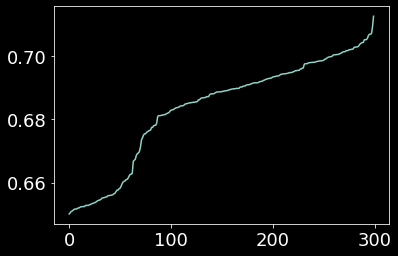

In [7]:
plt.plot(sorted(pds))

In [3]:
pd6 = []
for root, dirs, files in os.walk('data/SP_ALL'):
    for name in files:
        # filename = os.path.join(root, name)
        pd6.append(float(name[:-4].split('_')[-1]))

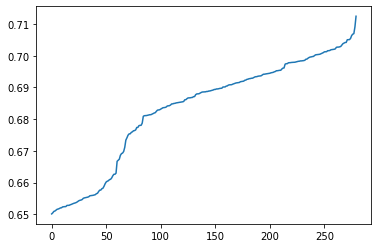

In [4]:
plt.plot(sorted(pd6))

In [5]:
min_pd = min(pd6)
max_pd = max(pd6)
pd_100 = []
for i in range(100):
    cur_pd = min_pd + i * (max_pd - min_pd) / 100
    idx = np.argmin([abs(cur_pd - pd) for pd in pd6])
    pd_100.append(pd6.pop(idx))

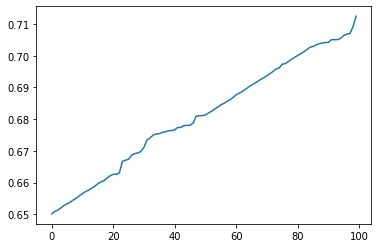

In [6]:
plt.plot(sorted(pd_100))

In [6]:
for pd in pd_100:
    with open('data/sphere_packing/sphere_packing_{:.6f}.xyz'.format(pd), 'r') as fr, \
         open('data/sphere_packing_100_0.65_0.71/sphere_packing_{:.6f}.xyz'.format(pd), 'w') as fw:
        fw.write(fr.read())

(array([2., 3., 4., 7., 6., 5., 3., 3., 5., 6., 2., 1., 4., 1., 0., 1., 3.,
        2., 1., 1., 3., 0., 0., 0., 0., 0., 1., 2., 0., 1., 2., 1., 0., 1.,
        0., 0., 0., 1., 1., 1., 2., 2., 3., 2., 3., 1., 0., 0., 0., 5., 5.,
        3., 3., 5., 5., 5., 9., 2., 6., 3., 5., 9., 8., 8., 6., 6., 9., 4.,
        7., 7., 7., 7., 6., 4., 0., 3., 9., 8., 3., 5., 7., 4., 5., 5., 5.,
        1., 4., 0., 4., 0., 3., 1., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([0.65013496, 0.65075782, 0.65138067, 0.65200353, 0.65262638,
        0.65324924, 0.65387209, 0.65449495, 0.6551178 , 0.65574066,
        0.65636351, 0.65698637, 0.65760922, 0.65823208, 0.65885493,
        0.65947779, 0.66010064, 0.6607235 , 0.66134635, 0.66196921,
        0.66259206, 0.66321492, 0.66383777, 0.66446063, 0.66508348,
        0.66570634, 0.66632919, 0.66695205, 0.6675749 , 0.66819776,
        0.66882062, 0.66944347, 0.67006633, 0.67068918, 0.67131204,
        0.67193489, 0.67255775, 0.6731806 , 0.67380346, 0.67442631,
      

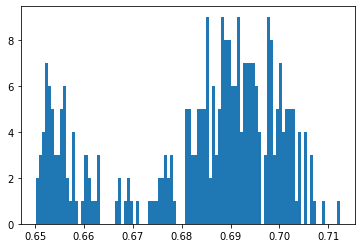

In [5]:
plt.hist(pds, bins=100)

In [7]:
min(pds)

0.6501349607796599

In [8]:
indexes = []
for i in np.arange(0.65, 0.72, 0.01):
    index = np.argmin(abs(np.array(pds) - i))
    indexes.append(index)

In [9]:
[pds[index] for index in indexes]

[0.6501349607796599,
 0.6602057752609332,
 0.6698089986526056,
 0.6809020524615627,
 0.6901146575553395,
 0.7000491871196222,
 0.7090680439715346]

In [10]:
len(pds)

300

In [14]:
pd6 = []
for root, dirs, files in os.walk('data/CP_ALL'):
    for name in files:
        # filename = os.path.join(root, name)
        pd6.append(float(name[:-4].split('_')[-1]))

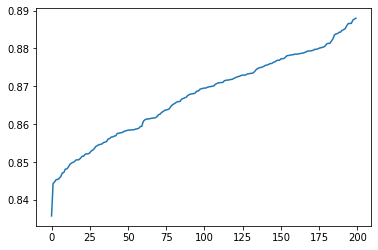

In [15]:
pd6.sort()
plt.plot(pd6)

In [16]:
min_pd = min(pd6[1:])
max_pd = max(pd6)
pd_100 = []
for i in range(100):
    cur_pd = min_pd + i * (max_pd - min_pd) / 100
    idx = np.argmin([abs(cur_pd - pd) for pd in pd6])
    pd_100.append(pd6.pop(idx))

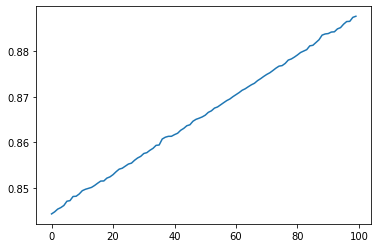

In [17]:
plt.plot(pd_100)

In [18]:
import shutil
for pd in pd_100:
    shutil.copy(f'data/CP_ALL/circle_packing_{pd:.6f}.xyz', f'data/CP100/circle_packing_{pd:.6f}.xyz')

In [22]:
s = '12 3 123'
a,b,c=list(map(float, s.split(' ')))

In [29]:
for root, dirs, files in os.walk('data/CP_ALL/'):
    for name in files:
        filename = os.path.join(root, name)
        with open(filename, 'r') as fr:
            with open(f'data/CP_/{name[:-4]}', 'w') as fw:
                fw.write(fr.read())

In [65]:
pds = []
count = 0
for root, dirs, files in os.walk('data/RSA'):
    for name in files:
        if name[-3:] != 'pac':
            continue
        filename = os.path.join(root, name)
        with open(filename, 'r') as fr:
            N = int(next(fr))
            L = float(next(fr))
            
            points = np.loadtxt(fr)
            pd = N * np.pi / L**2
            pds.append(pd)
            
            with open(f'data/CP_RSA/circle_packing_{count}_{pd:.6f}.xyz', 'w') as fw:
                fw.write(str(N) + '\n')
                fw.write(f'{L} {L}\n')
                np.savetxt(fw, points)
                count += 1

In [77]:
with open('data/tmph_a_1483537_sm9545.xyz') as fr:
    N = int(next(fr))
    Lx, Ly, Lz = list(map(float, next(fr).split(' ')))
    points = np.loadtxt(fr)

    points[:,-1] /=2

    with open('data/Boattini_324.xyz', 'w') as fw:
        fw.write(str(N) + '\n')
        fw.write(f'{Lx} {Ly} {Lz}\n')
        np.savetxt(fw, points)
            

In [71]:
N

324

In [72]:
Lx, Ly, Lz 

(4.53856, 4.53856, 9.07712)

In [76]:
points

array([[0.        , 0.0468863 , 4.53113   , 9.03016   , 0.5       ],
       [0.        , 0.0608255 , 0.715962  , 0.754715  , 0.5       ],
       [0.        , 0.791463  , 0.00927492, 0.760436  , 0.5       ],
       ...,
       [0.        , 3.03094   , 3.8421    , 8.29856   , 0.5       ],
       [0.        , 3.77289   , 3.04807   , 8.3396    , 0.5       ],
       [0.        , 3.7606    , 3.83323   , 7.58232   , 0.5       ]])

In [75]:
points[:,-1] /=2

In [2]:
data = np.load('data/Baseline_19.npy')
labels = np.load('data/lj-r2.0_scaled_shuffled_equal_labels.npy')

In [14]:
pds = []
for root, dirs, files in os.walk('data/1000sphere'):
    for name in files:
        if name[-20:] == 'packingstructure.txt' and name[:3] != '100':
            filename = os.path.join(root, name)
            with open(filename, 'r') as fr:
                N = int(next(fr))
                L = float(next(fr).strip().split()[1])
                assert N == 1000
                points = np.loadtxt(fr)
                pd = N * np.pi * 4/3/ L**3
                pds.append(pd)
                
                with open('data/SP_JAM/sphere_packing_{:.6f}.xyz'.format(pd), 'w') as fw:
                    fw.write(str(N) + '\n')
                    fw.write(f'{L} {L} {L}\n')

                    np.savetxt(fw, points)

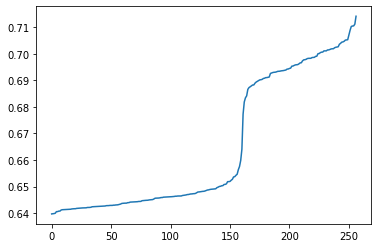

In [15]:
pds.sort()
plt.plot(pds)

In [10]:
s[:3]

'100'

In [8]:
a=[[0,0,0],[1,1,1]] + [[2,2,2]]

In [7]:
a

[[0, 0, 0], [1, 1, 1], 2, 2, 2]

# For CP_MDRP

In [4]:
pds = []
for root, dirs, files in os.walk('data/CP_MDRP_RES'):
    for name in files:
        if name[-20:] == 'packingstructure.txt':
            filename = os.path.join(root, name)
            with open(filename, 'r') as fr:
                text = fr.readlines()
                N = int(text[9])
                L = float(text[3].strip().split()[0])
                assert N == 150
                points = np.loadtxt(text[10:160])
                pd = N * np.pi / L**2
                pds.append(pd)
                
                with open('data/CP_MDRP/circle_packing_{:.6f}.xyz'.format(pd), 'w') as fw:
                    fw.write(str(N) + '\n')
                    fw.write(f'{L} {L}\n')
                    np.savetxt(fw, points)

203


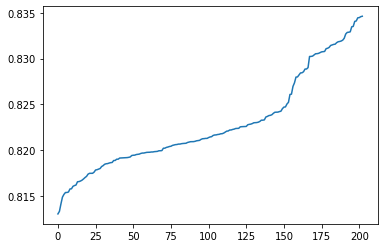

In [5]:
pds.sort()
print(len(pds))
plt.plot(pds)

# Binary Circle

In [10]:
radius = 2.0
pds = []
for root, dirs, files in os.walk(f'data/BinaryCircle_{radius:.1f}'):
    for name in files:
        if name[-20:] == 'packingstructure.txt':
            filename = os.path.join(root, name)
            with open(filename, 'r') as fr:
                text = fr.readlines()
                N = int(text[8].split()[0])
                L = float(text[3].strip().split()[0])
                assert N == 400
                points = np.loadtxt(text[11:411])
                pd = (133 * np.pi * radius ** 2 + 267 * np.pi) / L**2
                pds.append(pd)
                
                with open(f'data/BinaryCircle2/Circle({radius:.0f})[33.3%]-Circle(1)[66.6%]_400_{pd:.6f}_AthermalQuasistaticCompression_11181012.xyz'.format(pd), 'w') as fw:
                    fw.write(str(N) + '\n')
                    fw.write(f'Lattice="{L:.6e} 0.0 0.0 0.0 {L:.6e} 0.0 0.0 0.0 1.0" Origin="0.0 0.0 0.0" Properties=species:S:1:unishape_species:S:1:shape_type:S:1:pos:R:3:orientation:R:4:aspherical_shape:R:3\n')
                    for i in range(133):
                        fw.write(f'0\t0\tCircle\t{points[i,0]:.6e}\t{points[i,1]:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{1:.6e}\t{radius:.6e}\t{radius:.6e}\t{radius:.6e}\n')
                    for i in range(133, 400):
                        fw.write(f'1\t1\tCircle\t{points[i,0]:.6e}\t{points[i,1]:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\n')
                    
                    fw.write('\n')
                    fw.write('Periodic: true\n')
                    fw.write('Provider: Huangzhaohui\n')
                    fw.write(f'Density: {pd:.6e}\n')
                    fw.write('Algorithm: AthermalQuasistaticCompression')

30


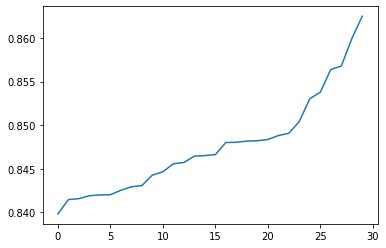

In [79]:
pds.sort()
print(len(pds))
plt.plot(pds)

# RCP Sphere

In [38]:
pds = []
for root, dirs, files in os.walk('data/SP100_64'):
    for name in files:
        filename = os.path.join(root, name)
        with open(filename, 'r') as fr:
            N = int(next(fr))
            L = list(map(float, next(fr).split()))[0]
            points = np.loadtxt(fr)
            pd = 4 / 3 * N * np.pi / L ** 3
            pds.append(pd)
            
            with open(f'data/sphere_asc_100_64/Sphere(1)[100%]_1000_{pd:.6f}_AdaptiveShrinkingCell_11231700.xyz'.format(pd), 'w') as fw:
                fw.write(str(N) + '\n')
                fw.write(f'Lattice="{L:.6e} 0.0 0.0 0.0 {L:.6e} 0.0 0.0 0.0 {L:.6e}" Origin="0.0 0.0 0.0" Properties=species:S:1:unishape_species:S:1:shape_type:S:1:pos:R:3:orientation:R:4:aspherical_shape:R:3\n')
                for i in range(N):
                    fw.write(f'0\t0\tSphere\t{points[i,0]:.6e}\t{points[i,1]:.6e}\t{points[i,2]:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\n')

                fw.write('\n')
                fw.write('Periodic: true\n')
                fw.write('Provider: Huangzhaohui\n')
                fw.write(f'Density: {pd:.6e}\n')
                fw.write('Algorithm: AdaptiveShrinkingCell')

In [13]:
from ovito.io import export_file, import_file

In [16]:
pipeline = import_file('/mnt/Edisk/kiwi/OPSI/data/sphere_relaxation_100_64/Sphere(1)[100%]_1000_0.641_Relaxation_period_123164642.xyz')
data = pipeline.source.data
data.cell_.pbc = [True, True, True]
positions = data.particles["Position"]
box_len = data.cell[0][0]

In [31]:
data.particles.values()

[Property('Particle Type'), Property('Position'), Property('Orientation'), Property('Aspherical Shape')]

In [43]:
def noncenter_dataset(filename, cloud_size):
	pipeline = import_file(filename)
	data = pipeline.source.data
	data.cell_.pbc = [True, True, True]
	positions = data.particles["Position"]
	box_len = data.cell[0][0]


	grids = defaultdict(list)
	resolution = 1
	grid_num = int(box_len // resolution)
	grid_len = box_len / grid_num
	ic(grid_len, grid_num)
	for index in range(data.particles.count):
		grid_pos = tuple(map(int, positions[index] // grid_len))
		grids[grid_pos].append(index)

	centers = []
	neighbors = []
	neighbor_indices = set()
	for i in range(grid_num):
		for j in range(grid_num):
			for k in range(grid_num):
				corrected = {}
				distance = {}
				center = np.array([i+0.5, j+0.5, k+0.5]) * grid_len
				for p in range(-2,3):
					for q in range(-2,3):
						for r in range(-2,3):
							grid_pos = [i+p, j+q, k+r]
							offset = np.zeros(3)
							for t in range(3):
								if grid_pos[t] < 0:
									grid_pos[t] += grid_num
									offset[t] = -box_len
								elif grid_pos[t] >= grid_num:
									grid_pos[t] -= grid_num
									offset[t] = box_len

							for index in grids[tuple(grid_pos)]:
								particle_pos = positions[index] + offset
								distance[index] = np.linalg.norm(center - particle_pos)
								corrected[index] = particle_pos

				nearest = sorted(distance, key=distance.get)[:cloud_size]
				if tuple(nearest) not in neighbor_indices:
					neighbor_indices.add(tuple(nearest))
					point_cloud = np.array([corrected[index] for index in nearest])
					neighbors.append(point_cloud - point_cloud.mean(axis=0))
					centers.append(center + point_cloud.mean(axis=0))
	
	return centers, neighbors

In [44]:
def make_dataset(cloud_size):
    neighbor_list = []
    for root, dirs, files in os.walk('data/Sphere100_64'):
        for name in files:
            filename = os.path.join(root, name)
            centers, neighbors = noncenter_dataset(filename, cloud_size)
            neighbor_list.append(neighbors)

    dataset = np.concatenate(neighbor_list, axis=0)
    ic(len(dataset))
    np.save(f'data/mrj_{cloud_size}_samples.npy', dataset)

In [45]:
for i in range(7, 13):
	make_dataset(i)

ic| grid_len: 1.0393594444444443, grid_num: 18
ic| grid_len: 1.0393294444444445, grid_num: 18
ic| grid_len: 1.039288888888889, grid_num: 18
ic| grid_len: 1.0392222222222223, grid_num: 18
ic| grid_len: 1.0388944444444443, grid_num: 18
ic| grid_len: 1.0388883333333334, grid_num: 18
ic| grid_len: 1.0387916666666668, grid_num: 18
ic| grid_len: 1.0387816666666667, grid_num: 18
ic| grid_len: 1.0385594444444444, grid_num: 18
ic| grid_len: 1.0384888888888888, grid_num: 18
ic| grid_len: 1.0384761111111112, grid_num: 18
ic| grid_len: 1.0384644444444444, grid_num: 18
ic| grid_len: 1.03846, grid_num: 18
ic| grid_len: 1.03843, grid_num: 18
ic| grid_len: 1.0384066666666667, grid_num: 18
ic| grid_len: 1.038405, grid_num: 18
ic| grid_len: 1.038343888888889, grid_num: 18
ic| grid_len: 1.038317777777778, grid_num: 18
ic| grid_len: 1.038303888888889, grid_num: 18
ic| grid_len: 1.0382377777777778, grid_num: 18
ic| grid_len: 1.0382116666666665, grid_num: 18
ic| grid_len: 1.0381883333333333, grid_num: 18
ic

### 格式转换

In [42]:
def FormatTrans(dataname, number, algorithm, provider, circle=True):
	pds = []
	if circle:
		prefix = f'Circle_{number}_{algorithm}'
	else:
		prefix = f'Sphere_{number}_{algorithm}'

	if not os.path.exists(f'data/{prefix}'):
		os.mkdir(f'data/{prefix}')

	for root, dirs, files in os.walk(f'data/{dataname}'):
		for name in files:
			filename = os.path.join(root, name)
			with open(filename, 'r') as fr:
				N = int(next(fr))
				assert N == number
				L = list(map(float, next(fr).split()))[0]
				points = np.loadtxt(fr)
				if circle:
					pd = N * np.pi / L ** 2
				else:
					pd = 4 / 3 * N * np.pi / L ** 3
				pds.append(pd)
				
				with open(f'data/{prefix}/{prefix}_{pd:.6f}.xyz', 'w') as fw:
					fw.write(str(N) + '\n')
					fw.write(f'Lattice="{L:.6e} 0.0 0.0 0.0 {L:.6e} 0.0 0.0 0.0 {L:.6e}" Origin="0.0 0.0 0.0" Properties=species:S:1:unishape_species:S:1:shape_type:S:1:pos:R:3:orientation:R:4:aspherical_shape:R:3\n')
					for i in range(N):
						if circle:
							fw.write(f'0\t0\tCircle\t{points[i,0]:.6e}\t{points[i,1]:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\n')
						else:
							fw.write(f'0\t0\tSphere\t{points[i,0]:.6e}\t{points[i,1]:.6e}\t{points[i,2]:.6e}\t{0:.6e}\t{0:.6e}\t{0:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\t{1:.6e}\n')

					fw.write('\n')
					fw.write('Periodic: True\n')
					fw.write(f'Algorithm: {algorithm}\n')
					fw.write(f'Density: {pd:.6f}\n')
					fw.write(f'Provider: {provider}\n')
	
	pds.sort()
	print(len(pds))
	plt.plot(pds)

100


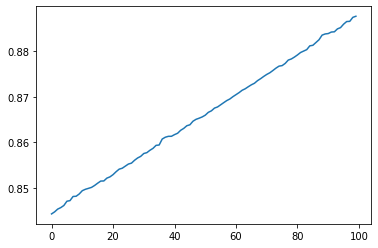

In [43]:
FormatTrans('CP100', 400, 'AthermalQuasistaticCompression', 'Huang Zhaohui')

200


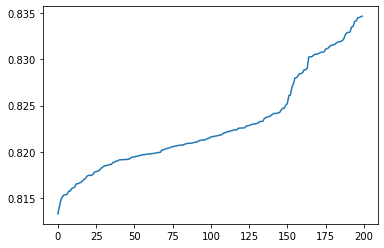

In [44]:
FormatTrans('CP200_MDRP', 150, 'InverseMonteCarlo', 'Huang Zhaohui')

100


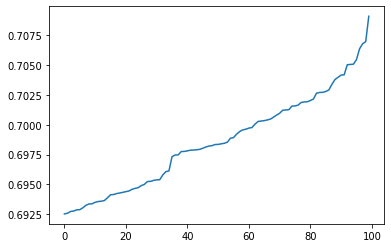

In [45]:
FormatTrans('SP100_70', 1000, 'ImprovedRelaxation', 'Deng Wei', False)

100


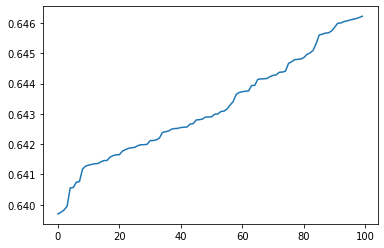

In [46]:
FormatTrans('SP100_64', 1000, 'AdaptiveShrinkingCell', 'Huang Zhaohui', False)